In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
cardio_data = pd.read_excel("cardio_train.xlsx")

# Exploratory Analysis

In [3]:
cardio_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
cardio_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Count'>

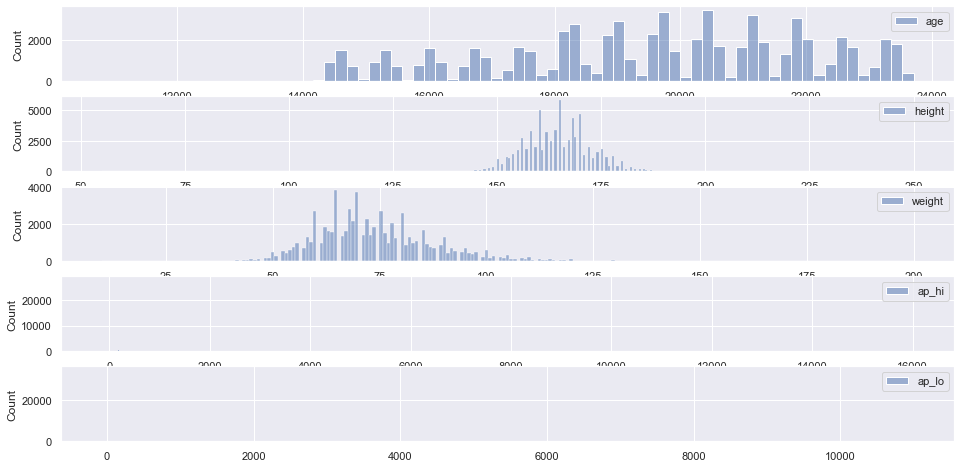

In [5]:
f, axes = plt.subplots(5, 1, figsize=(16, 8))

sb.histplot(data = cardio_data[["age"]], ax = axes[0])
sb.histplot(data = cardio_data[["height"]], ax = axes[1])
sb.histplot(data = cardio_data[["weight"]], ax = axes[2])
sb.histplot(data = cardio_data[["ap_hi"]], ax = axes[3])
sb.histplot(data = cardio_data[["ap_lo"]], ax = axes[4])

<AxesSubplot:>

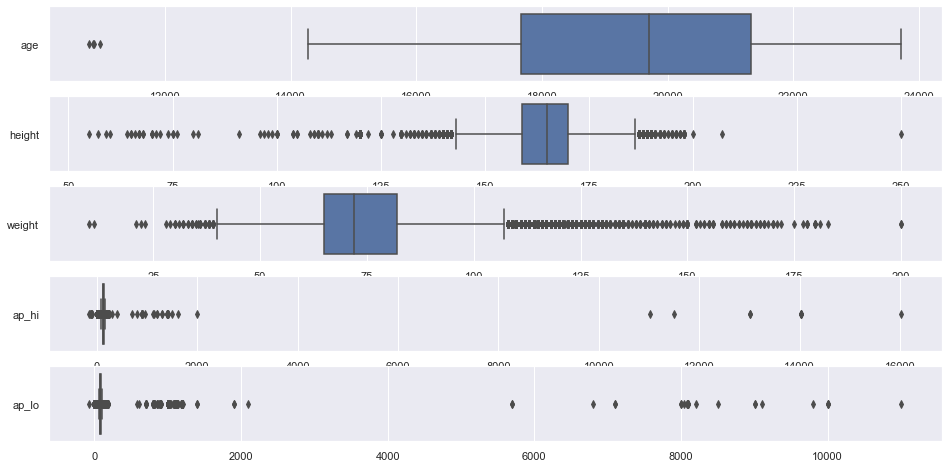

In [6]:
f, axes = plt.subplots(5, 1, figsize=(16, 8))

sb.boxplot(data = cardio_data[["age"]], ax = axes[0], orient = "h")
sb.boxplot(data = cardio_data[["height"]], ax = axes[1], orient = "h")
sb.boxplot(data = cardio_data[["weight"]], ax = axes[2], orient = "h")
sb.boxplot(data = cardio_data[["ap_hi"]], ax = axes[3], orient = "h")
sb.boxplot(data = cardio_data[["ap_lo"]], ax = axes[4], orient = "h")

# Cleaning up the data

In [7]:
cardio_data.drop(cardio_data[cardio_data['ap_hi'] > 180].index, inplace = True)
cardio_data.drop(cardio_data[cardio_data['ap_hi'] < 90].index, inplace = True)
#hypertensive crisis

cardio_data.drop(cardio_data[cardio_data['ap_lo'] > 120].index, inplace = True)
cardio_data.drop(cardio_data[cardio_data['ap_lo'] < 60].index, inplace = True)
#lowest before death

cardio_data.drop(cardio_data[cardio_data['weight'] < 40].index, inplace = True)

cardio_data.drop(cardio_data[cardio_data['height'] < 120].index, inplace = True)

cardio_data['smoke'] = cardio_data['smoke'].astype('bool')
cardio_data['active'] = cardio_data['active'].astype('bool')
cardio_data['cardio'] = cardio_data['cardio'].astype('bool')
cardio_data['alco'] = cardio_data['alco'].astype('bool')

In [8]:
cardio_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,False,False,True,False
1,1,20228,1,156,85.0,140,90,3,1,False,False,True,True
2,2,18857,1,165,64.0,130,70,3,1,False,False,False,True
3,3,17623,2,169,82.0,150,100,1,1,False,False,True,True
4,4,17474,1,156,56.0,100,60,1,1,False,False,False,False


<AxesSubplot:>

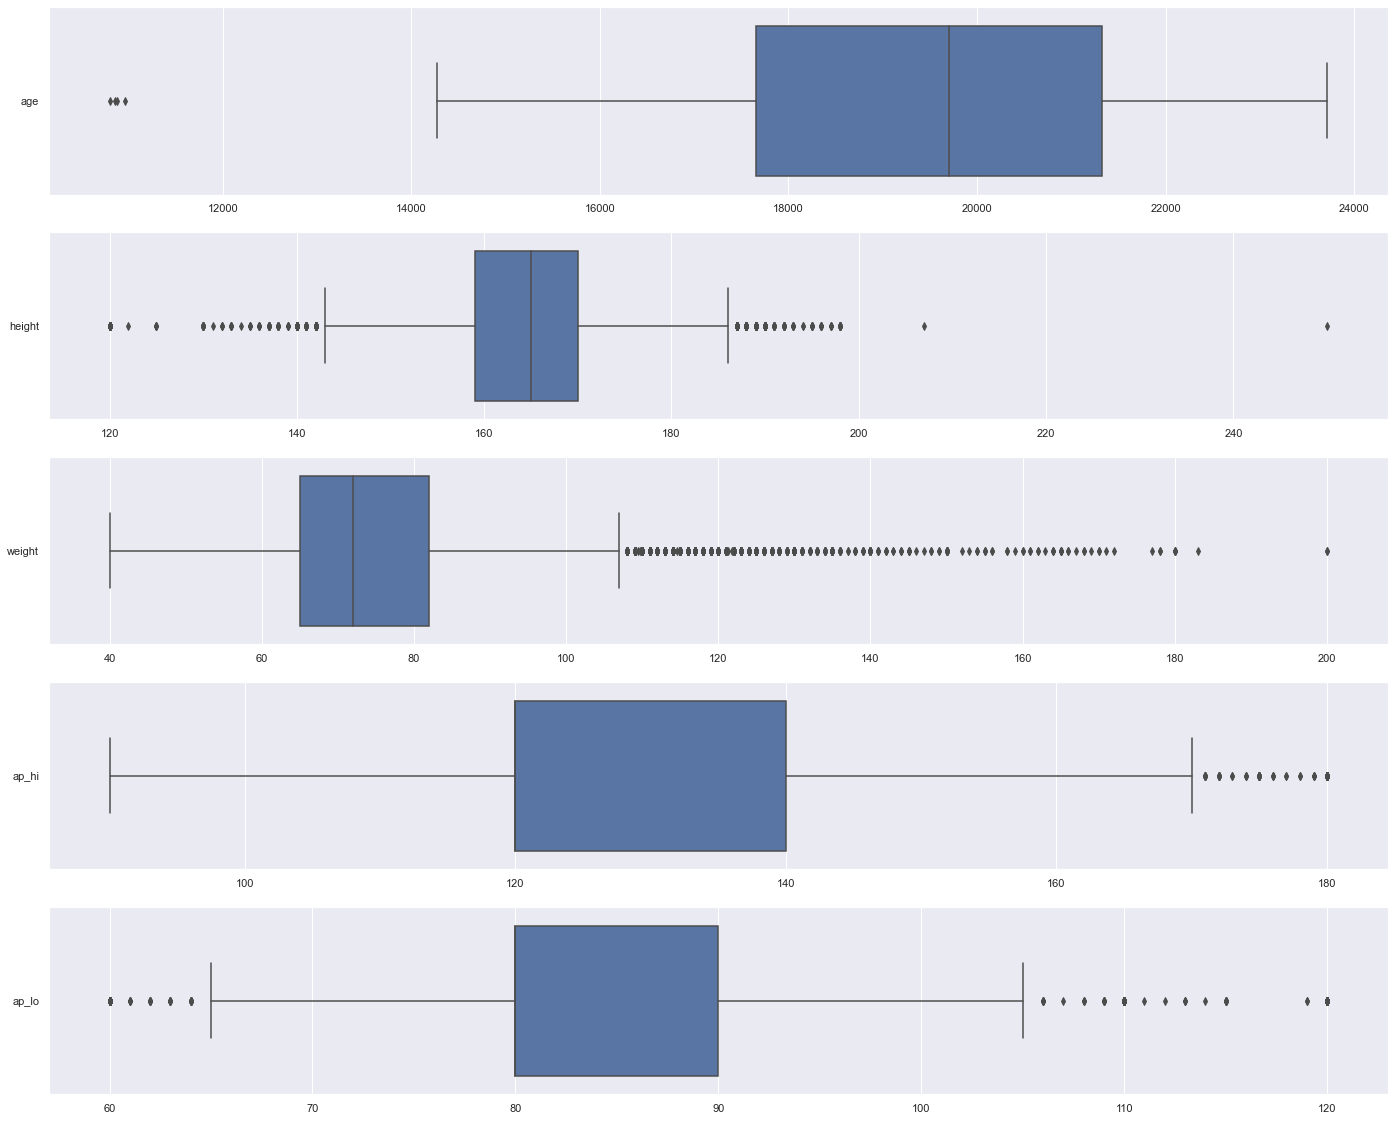

In [9]:
f, axes = plt.subplots(5, 1, figsize=(24, 20))

sb.boxplot(data = cardio_data[["age"]], ax = axes[0], orient = "h")
sb.boxplot(data = cardio_data[["height"]], ax = axes[1], orient = "h")
sb.boxplot(data = cardio_data[["weight"]], ax = axes[2], orient = "h")
sb.boxplot(data = cardio_data[["ap_hi"]], ax = axes[3], orient = "h")
sb.boxplot(data = cardio_data[["ap_lo"]], ax = axes[4], orient = "h")

<AxesSubplot:ylabel='Count'>

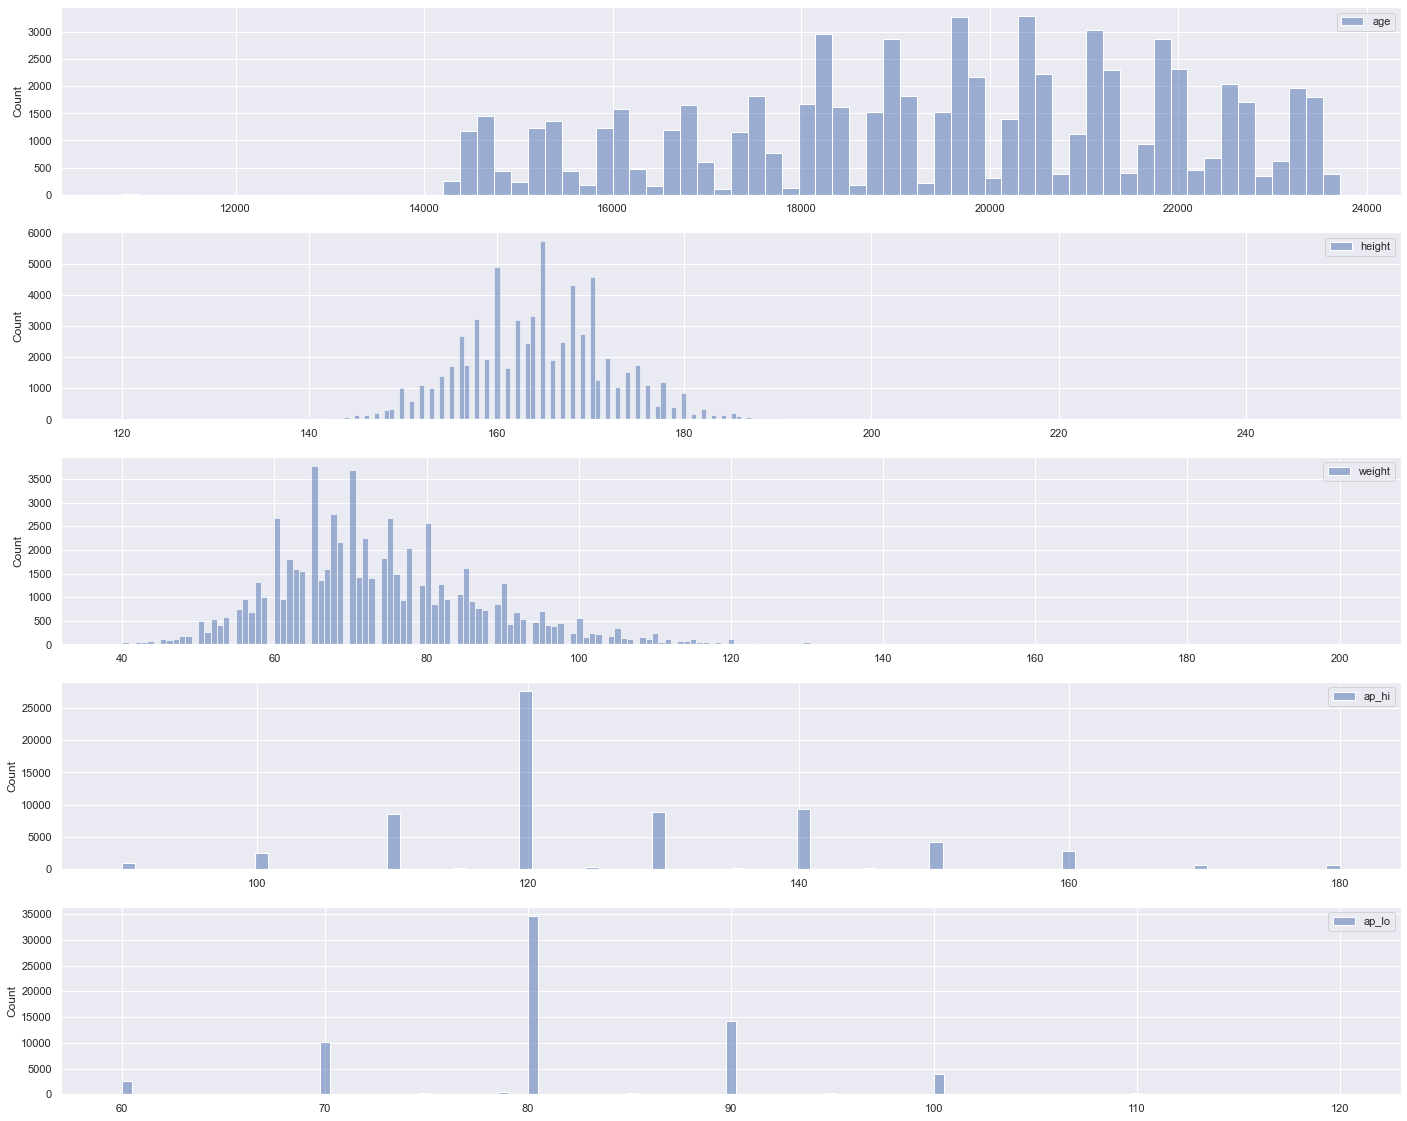

In [10]:
f, axes = plt.subplots(5, 1, figsize=(24, 20))

sb.histplot(data = cardio_data[["age"]], ax = axes[0])
sb.histplot(data = cardio_data[["height"]], ax = axes[1])
sb.histplot(data = cardio_data[["weight"]], ax = axes[2])
sb.histplot(data = cardio_data[["ap_hi"]], ax = axes[3])
sb.histplot(data = cardio_data[["ap_lo"]], ax = axes[4])


<AxesSubplot:xlabel='gender', ylabel='count'>

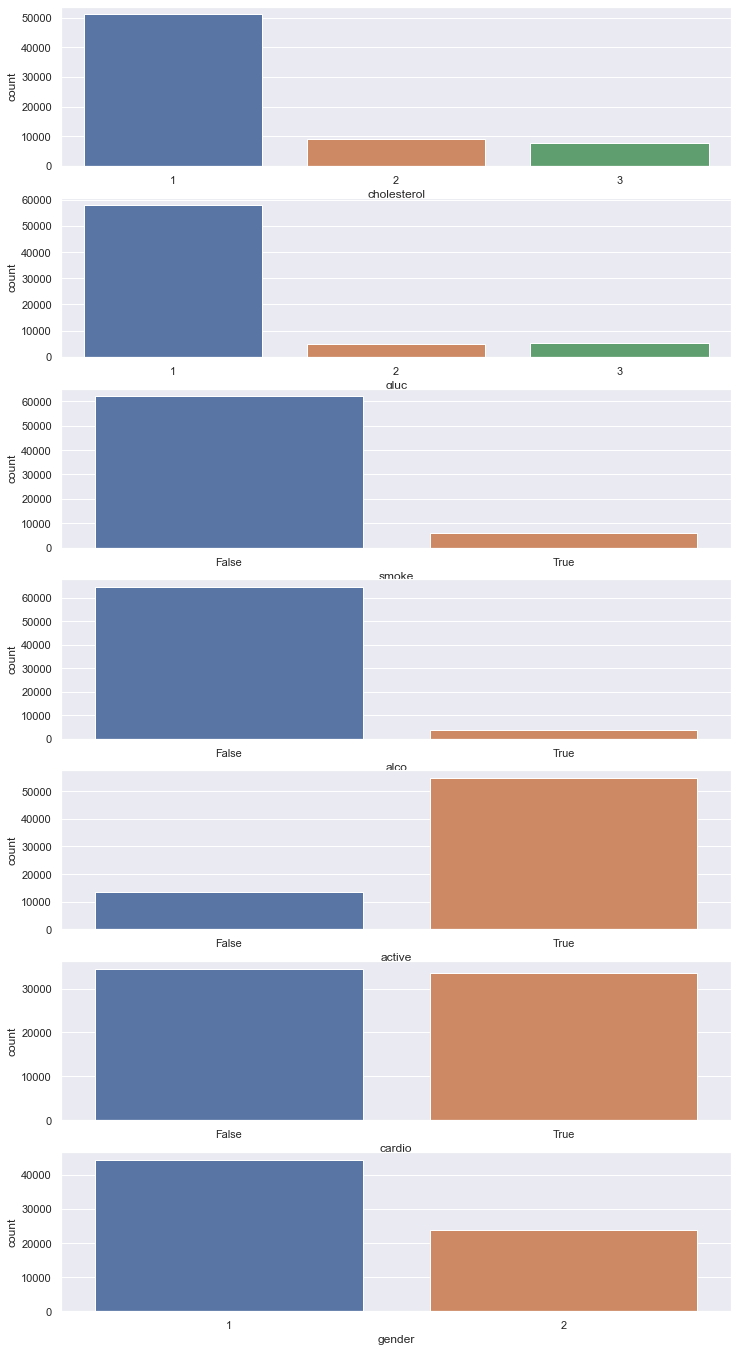

In [11]:
f, axes = plt.subplots(7, 1, figsize=(12, 24))

sb.countplot(data = cardio_data, ax = axes[0], x = "cholesterol")
sb.countplot(data = cardio_data, ax = axes[1], x = "gluc")
sb.countplot(data = cardio_data, ax = axes[2], x = "smoke")
sb.countplot(data = cardio_data, ax = axes[3], x = "alco")
sb.countplot(data = cardio_data, ax = axes[4], x = "active")
sb.countplot(data = cardio_data, ax = axes[5], x = "cardio")
sb.countplot(data = cardio_data, ax = axes[6], x = "gender")
# sb.countplot(data = cardio_data[["smoke"]], ax = axes[2])
# sb.countplot(data = cardio_data[["alco"]], ax = axes[3])
# sb.countplot(data = cardio_data[["active"]], ax = axes[4])
# sb.countplot(data = cardio_data[["cardio"]], ax = axes[5])

# Check All Healthy (Cardio = 0)

In [12]:
healthy = cardio_data[cardio_data['cardio'] == 0]
# healthy = healthy.drop(columns=['id'], axis=1)
healthy.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc
count,34477.000000,34477.000000,34477.00000,34477.000000,34477.000000,34477.000000,34477.000000,34477.000000,34477.000000
mean,49861.040752,18879.399368,1.34597,164.536677,71.618814,119.606027,78.173594,1.215564,1.175073
std,28872.321816,2471.410021,0.47569,7.800173,13.201938,12.085391,7.951486,0.526145,0.509489
min,0.000000,10798.000000,1.00000,120.000000,40.000000,90.000000,60.000000,1.000000,1.000000
25%,24725.000000,16839.000000,1.00000,159.000000,63.000000,110.000000,70.000000,1.000000,1.000000
50%,49855.000000,19004.000000,1.00000,165.000000,70.000000,120.000000,80.000000,1.000000,1.000000
75%,74731.000000,20802.000000,2.00000,170.000000,79.000000,120.000000,80.000000,1.000000,1.000000
max,99999.000000,23678.000000,2.00000,207.000000,200.000000,180.000000,120.000000,3.000000,3.000000


<AxesSubplot:>

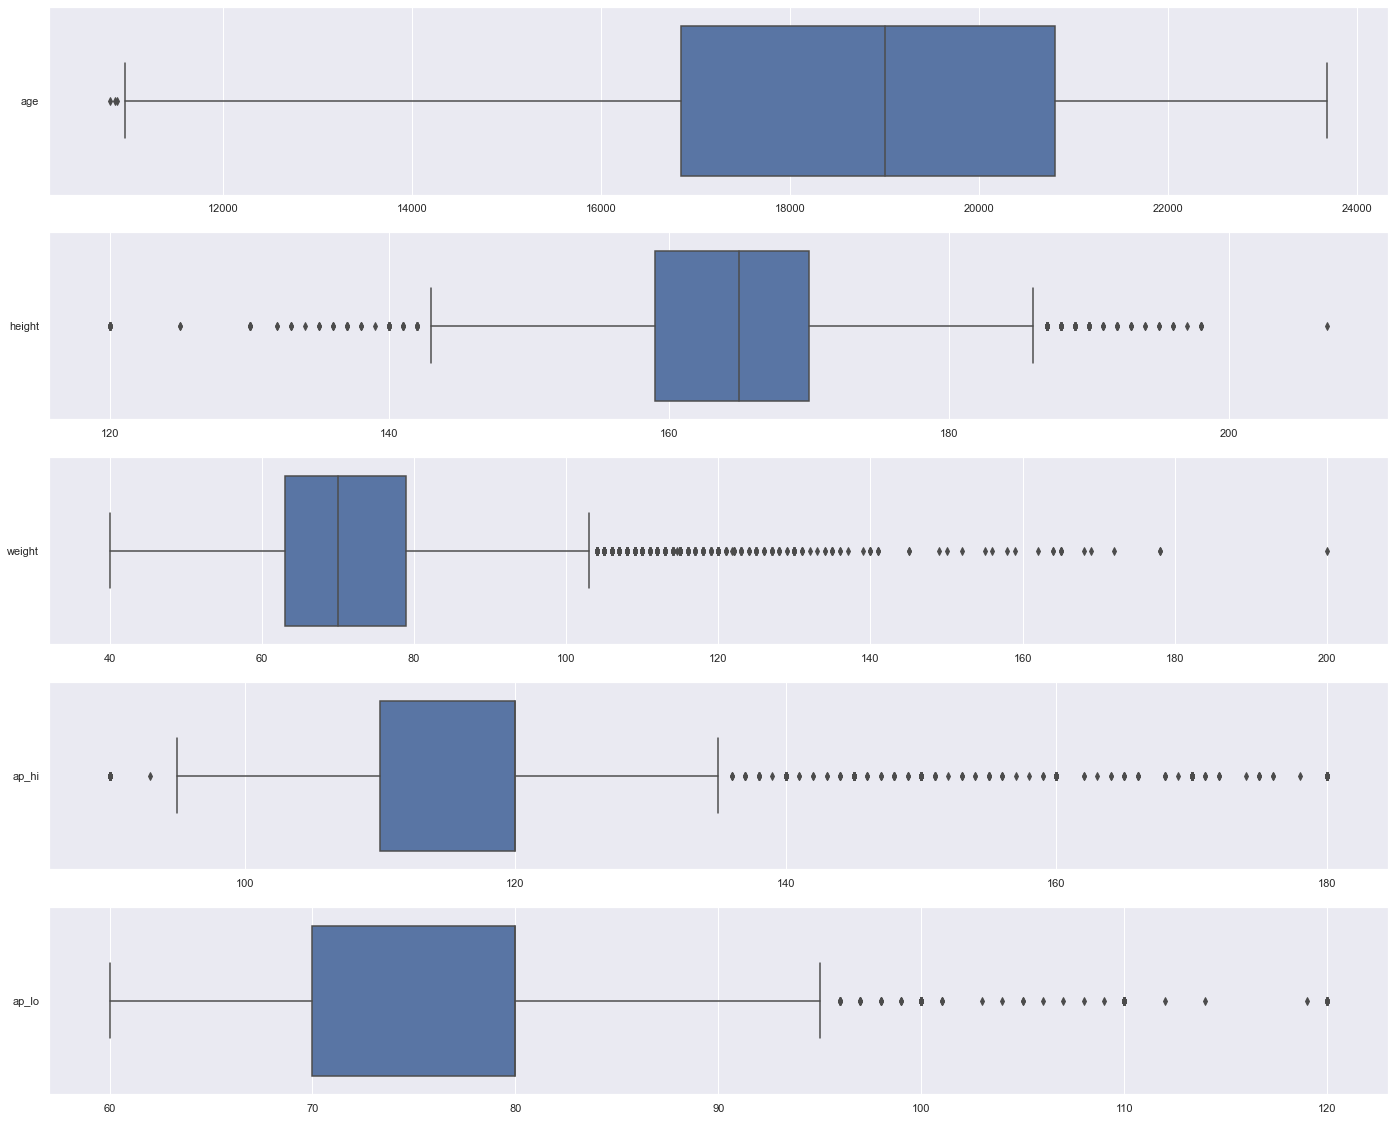

In [13]:
f, axes = plt.subplots(5, 1, figsize=(24, 20))

sb.boxplot(data = healthy[["age"]], ax = axes[0], orient = "h")
sb.boxplot(data = healthy[["height"]], ax = axes[1], orient = "h")
sb.boxplot(data = healthy[["weight"]], ax = axes[2], orient = "h")
sb.boxplot(data = healthy[["ap_hi"]], ax = axes[3], orient = "h")
sb.boxplot(data = healthy[["ap_lo"]], ax = axes[4], orient = "h")

<AxesSubplot:xlabel='gender', ylabel='count'>

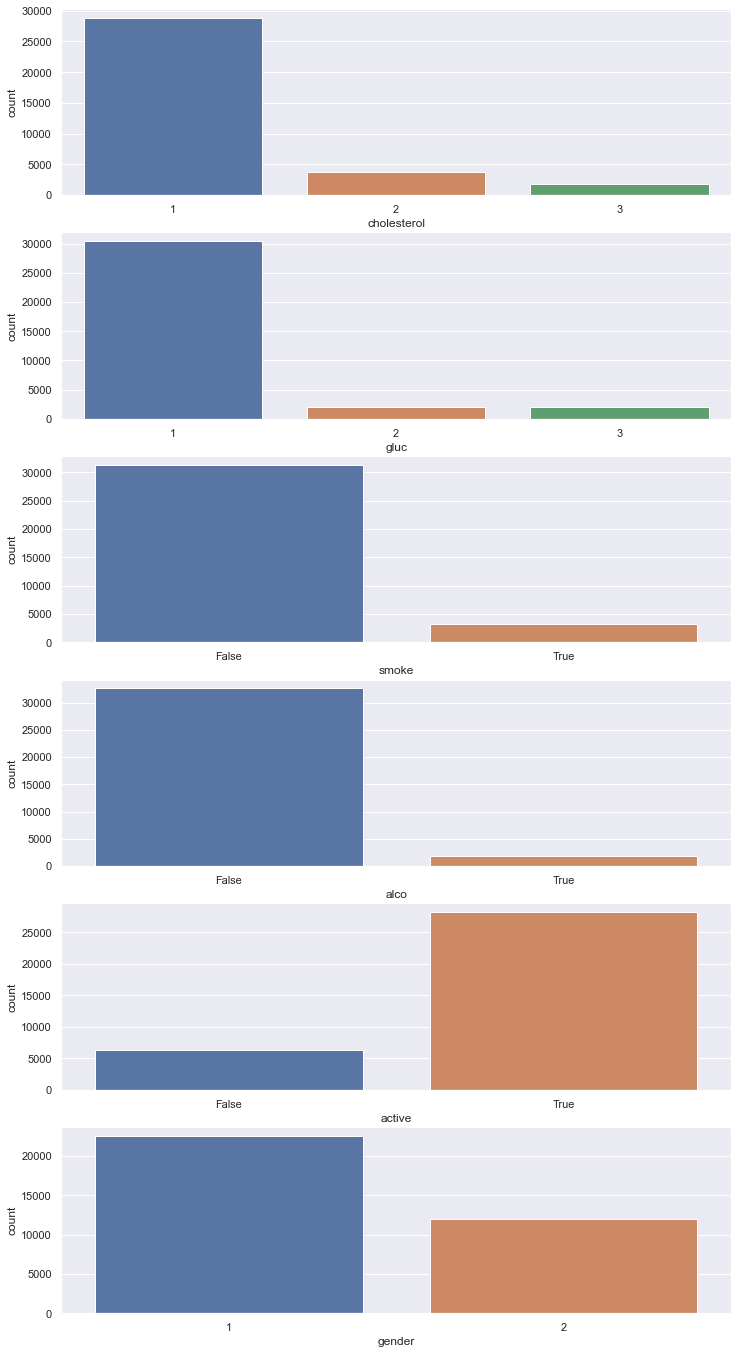

In [14]:
f, axes = plt.subplots(6, 1, figsize=(12, 24))

sb.countplot(data = healthy, ax = axes[0], x = "cholesterol")
sb.countplot(data = healthy, ax = axes[1], x = "gluc")
sb.countplot(data = healthy, ax = axes[2], x = "smoke")
sb.countplot(data = healthy, ax = axes[3], x = "alco")
sb.countplot(data = healthy, ax = axes[4], x = "active")
sb.countplot(data = healthy, ax = axes[5], x = "gender")
# sb.countplot(data = cardio_data[["smoke"]], ax = axes[2])
# sb.countplot(data = cardio_data[["alco"]], ax = axes[3])
# sb.countplot(data = cardio_data[["active"]], ax = axes[4])
# sb.countplot(data = cardio_data[["cardio"]], ax = axes[5])

# Check All w/ unhealthy lifestyle (smoke, drink, nonactive)

In [15]:
unhealthylifestyle = cardio_data.loc[(cardio_data['smoke'] == 1) & (cardio_data['active'] == 0) & (cardio_data['alco'] == 1)]
# healthy = healthy.drop(columns=['id'], axis=1)
unhealthylifestyle.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,52108.245421,18947.604396,1.897436,169.538462,80.679121,129.509158,83.010989,1.406593,1.234432
std,29513.846531,2593.816161,0.303946,7.370411,16.465446,15.675269,9.220535,0.685641,0.565544
min,180.000000,14440.000000,1.000000,147.000000,45.000000,100.000000,60.000000,1.000000,1.000000
25%,26138.000000,16838.000000,2.000000,165.000000,70.000000,120.000000,80.000000,1.000000,1.000000
50%,52069.000000,18904.000000,2.000000,170.000000,77.000000,130.000000,80.000000,1.000000,1.000000
75%,78413.000000,20973.000000,2.000000,174.000000,90.000000,140.000000,90.000000,2.000000,1.000000
max,99958.000000,23619.000000,2.000000,193.000000,144.000000,180.000000,120.000000,3.000000,3.000000


<AxesSubplot:xlabel='gender', ylabel='count'>

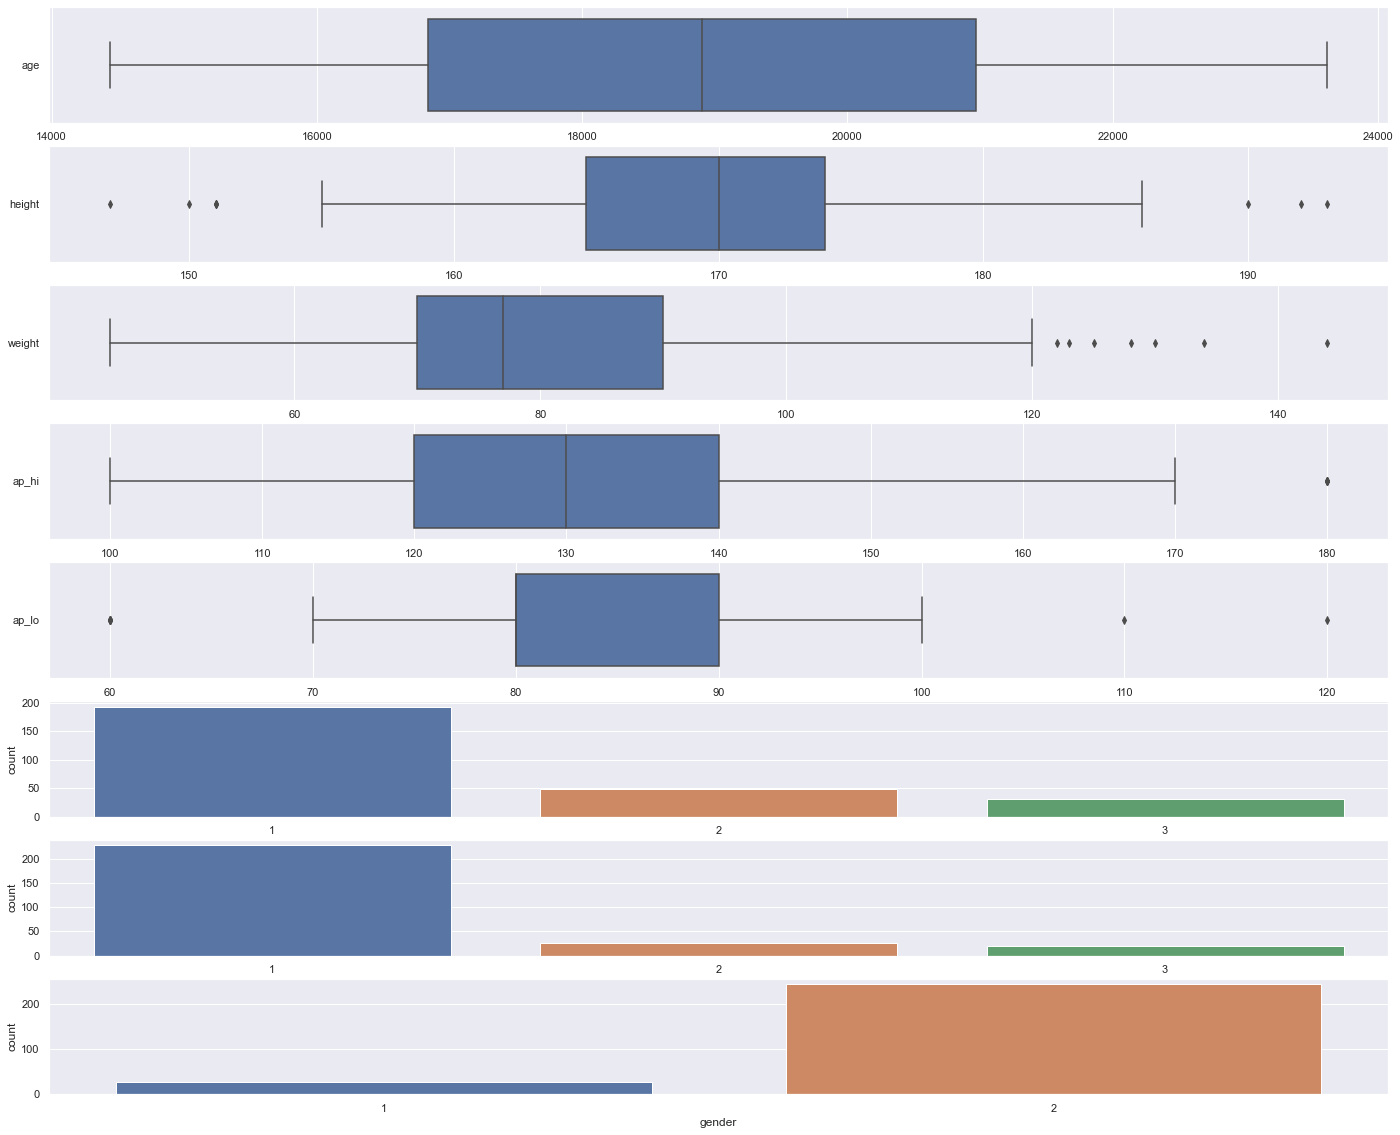

In [16]:
f, axes = plt.subplots(8, 1, figsize=(24, 20))

sb.boxplot(data = unhealthylifestyle[["age"]], ax = axes[0], orient = "h")
sb.boxplot(data = unhealthylifestyle[["height"]], ax = axes[1], orient = "h")
sb.boxplot(data = unhealthylifestyle[["weight"]], ax = axes[2], orient = "h")
sb.boxplot(data = unhealthylifestyle[["ap_hi"]], ax = axes[3], orient = "h")
sb.boxplot(data = unhealthylifestyle[["ap_lo"]], ax = axes[4], orient = "h")
sb.countplot(data = unhealthylifestyle, ax = axes[5], x = "cholesterol")
sb.countplot(data = unhealthylifestyle, ax = axes[6], x = "gluc")
sb.countplot(data = unhealthylifestyle, ax = axes[7], x = "gender")

# Check All unhealthy that are healthy (Cardio = 0)

In [17]:
unhealthylifestyle_healthy = unhealthylifestyle.loc[(unhealthylifestyle['cardio'] == 0)]

In [18]:
unhealthylifestyle_healthy.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc
count,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000
mean,54896.224000,18189.880000,1.904000,169.312000,76.70240,121.408000,79.536000,1.272000,1.168000
std,28428.554724,2415.300938,0.295777,7.614096,15.74936,11.836314,8.143416,0.559031,0.503792
min,321.000000,14440.000000,1.000000,151.000000,45.00000,100.000000,60.000000,1.000000,1.000000
25%,29857.000000,16054.000000,2.000000,165.000000,66.00000,120.000000,80.000000,1.000000,1.000000
50%,56653.000000,18135.000000,2.000000,169.000000,75.00000,120.000000,80.000000,1.000000,1.000000
75%,78658.000000,19808.000000,2.000000,174.000000,83.00000,127.000000,80.000000,1.000000,1.000000
max,99251.000000,23507.000000,2.000000,193.000000,130.00000,180.000000,100.000000,3.000000,3.000000


<AxesSubplot:xlabel='count', ylabel='gender'>

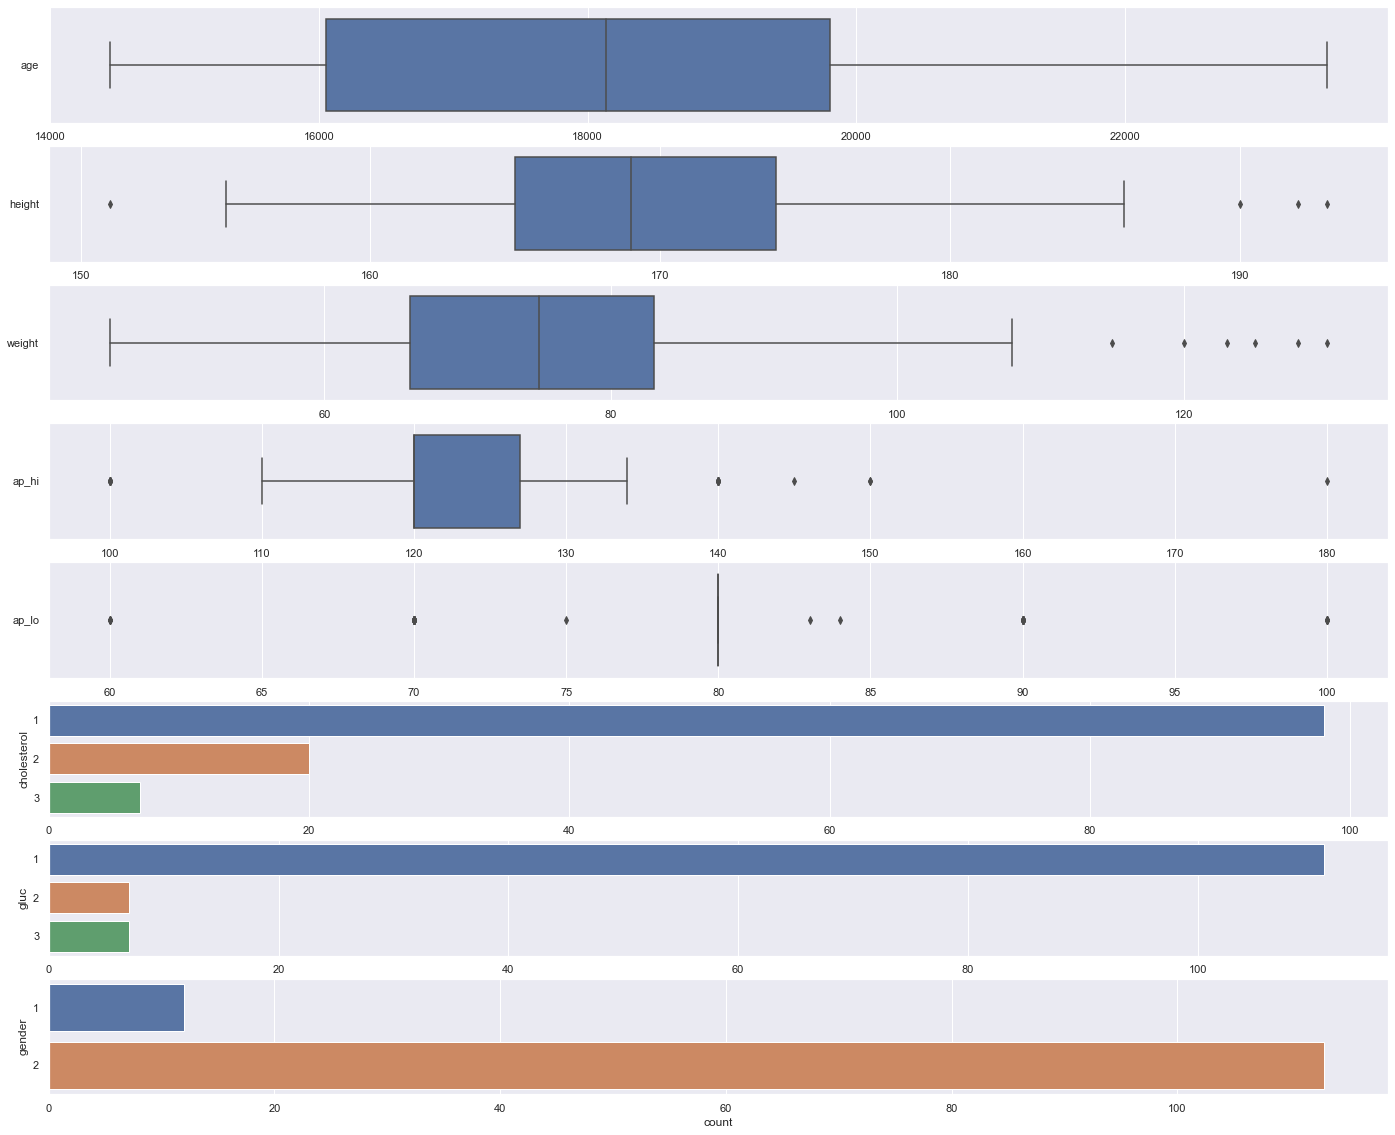

In [19]:
f, axes = plt.subplots(8, 1, figsize=(24, 20))

sb.boxplot(data = unhealthylifestyle_healthy[["age"]], ax = axes[0], orient = "h")
sb.boxplot(data = unhealthylifestyle_healthy[["height"]], ax = axes[1], orient = "h")
sb.boxplot(data = unhealthylifestyle_healthy[["weight"]], ax = axes[2], orient = "h")
sb.boxplot(data = unhealthylifestyle_healthy[["ap_hi"]], ax = axes[3], orient = "h")
sb.boxplot(data = unhealthylifestyle_healthy[["ap_lo"]], ax = axes[4], orient = "h")
sb.countplot(data = unhealthylifestyle_healthy, ax = axes[5], y = "cholesterol")
sb.countplot(data = unhealthylifestyle_healthy, ax = axes[6], y = "gluc")
sb.countplot(data = unhealthylifestyle_healthy, ax = axes[7], y = "gender")

# use classification tree for all unhealthy
#### Response Variable : i for i in list(cardio_data.columns) if i != 'cardio'
#### Predictor Feature : cardio

In [20]:
cardio_data.drop(columns=['id'])

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,False,False,True,False
1,20228,1,156,85.0,140,90,3,1,False,False,True,True
2,18857,1,165,64.0,130,70,3,1,False,False,False,True
3,17623,2,169,82.0,150,100,1,1,False,False,True,True
4,17474,1,156,56.0,100,60,1,1,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,True,False,True,False
69996,22601,1,158,126.0,140,90,2,2,False,False,True,True
69997,19066,2,183,105.0,180,90,3,1,False,True,False,True
69998,22431,1,163,72.0,135,80,1,2,False,False,False,True


In [21]:
y = unhealthylifestyle[['cardio']]
X = unhealthylifestyle[[i for i in list(cardio_data.columns) if i != 'cardio']]
# X = cardio_data[['smoke', 'alco', 'active']]

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8382352941176471

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6521739130434783



<AxesSubplot:>

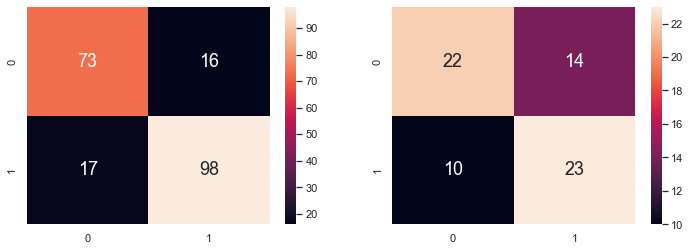

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

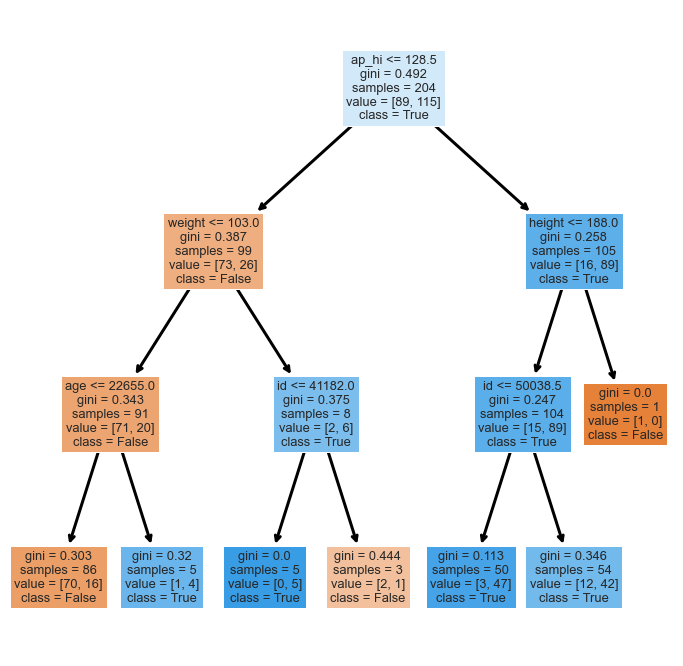

In [23]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

# use classification tree for all 
#### Response Variable : i for i in list(cardio_data.columns) if i != 'cardio'
#### Predictor Feature : cardio

In [24]:
y = cardio_data[['cardio']]
# X = cardio_data[[i for i in list(cardio_data.columns) if i != 'cardio']]
X = cardio_data[['smoke', 'alco', 'active']]

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5201151112938275

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5176767676767676



<AxesSubplot:>

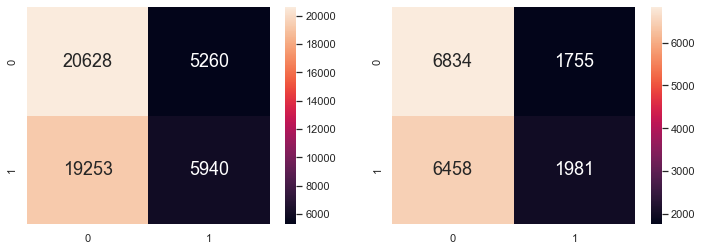

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

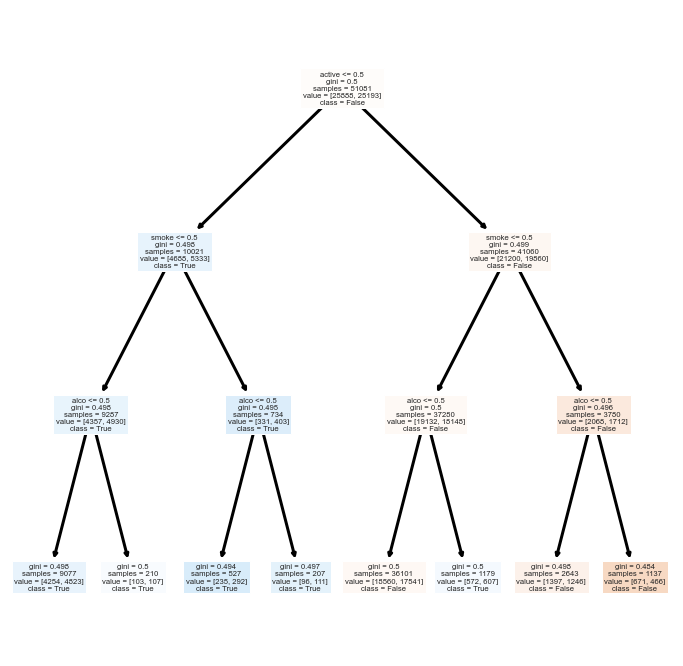

In [26]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

# let total = sum(active', alco, smoke)
#### Response Variable : active', alco, smoke
#### Predictor Feature : cardio

In [27]:
replaced = cardio_data.copy()
replaced['inactive'] = ~replaced['active']
replaced = replaced.drop(columns=['active'], axis=1)

In [28]:
column_names = ['alco', 'inactive', 'cardio']
replaced['total_unhealthy']= replaced[column_names].sum(axis=1)

In [29]:
replaced.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio,inactive,total_unhealthy
0,0,18393,2,168,62.0,110,80,1,1,False,False,False,False,0
1,1,20228,1,156,85.0,140,90,3,1,False,False,True,False,1
2,2,18857,1,165,64.0,130,70,3,1,False,False,True,True,2
3,3,17623,2,169,82.0,150,100,1,1,False,False,True,False,1
4,4,17474,1,156,56.0,100,60,1,1,False,False,False,True,1


# use classification tree for replaced
#### Response Variable : total_unhealthy
#### Predictor Feature : cardio

In [30]:
y = replaced[['cardio']]
# X = cardio_data[[i for i in list(cardio_data.columns) if i != 'cardio']]
X = replaced[['smoke', 'alco', 'inactive', 'total_unhealthy']]

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 1.0



<AxesSubplot:>

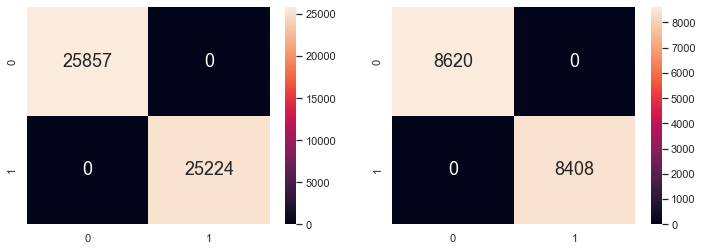

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
dectree.fit(X_train, y_train)    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

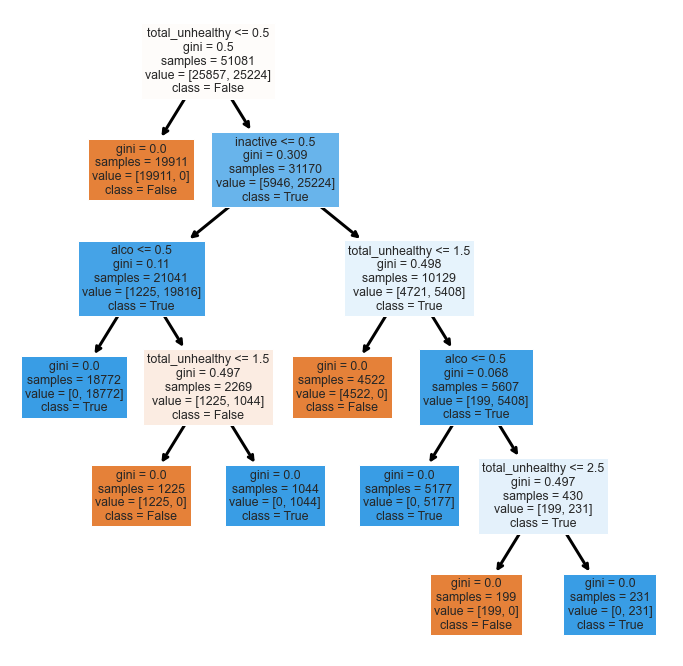

In [32]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

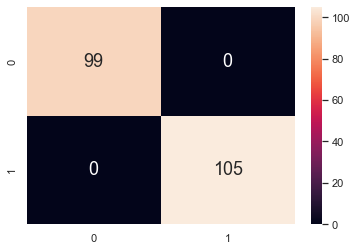

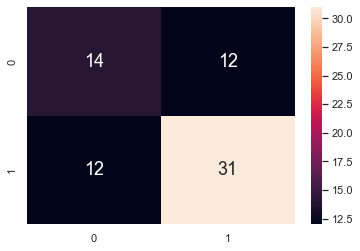

Train Model Accuracy:  1.0
Test Model Prediction Accuracy:  0.6521739130434783


In [42]:
y = unhealthylifestyle[['cardio']]
X = unhealthylifestyle[[i for i in list(cardio_data.columns) if i != 'cardio']]
# X = cardio_data[['smoke', 'alco', 'active']]

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
# dectree.fit(X_train, y_train)

randomforest = RandomForestClassifier(n_estimators = 50)
randomforest.fit(X_train, y_train.values.ravel())

randomforesttest_pred = randomforest.predict(X_test)
randomforesttrain_pred = randomforest.predict(X_train)

x = sb.heatmap(confusion_matrix(y_train, randomforesttrain_pred), annot = True, fmt = ".0f", annot_kws = {"size":18})
plt.show()

x = sb.heatmap(confusion_matrix(y_test, randomforesttest_pred), annot = True, fmt = ".0f", annot_kws = {"size":18})
plt.show()

print ("Train Model Accuracy: ", metrics.accuracy_score(y_train, randomforest.predict(X_train)))
print ("Test Model Prediction Accuracy: ", metrics.accuracy_score(y_test, randomforesttest_pred))

# y_train_pred = dectree.predict(X_train)
# y_test_pred = dectree.predict(X_test)



# # Check the Goodness of Fit (on Train Data)
# print("Goodness of Fit of Model \tTrain Dataset")
# print("Classification Accuracy \t:", dectree.score(X_train, y_train))
# print()

# # Check the Goodness of Fit (on Test Data)
# print("Goodness of Fit of Model \tTest Dataset")
# print("Classification Accuracy \t:", dectree.score(X_test, y_test))
# print()

# # Plot the Confusion Matrix for Train and Test
# f, axes = plt.subplots(1, 2, figsize=(12, 4))
# sb.heatmap(confusion_matrix(y_train, y_train_pred),
#            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
# sb.heatmap(confusion_matrix(y_test, y_test_pred), 
#            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
